In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [40]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

In [4]:
df=pd.read_csv("vehicle (1).csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [7]:
# Count missing values
df.isna().values.sum()

41

In [8]:
# Fill missing values with mean of the column inplace
df.fillna(df.mean(),inplace=True)

In [9]:
# Check and ensure the missing values are treated
df.isna().values.sum()

0

In [10]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 4

fig_size[1] = 4

plt.rcParams["figure.figsize"] = fig_size

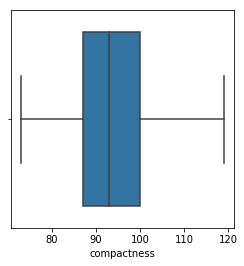

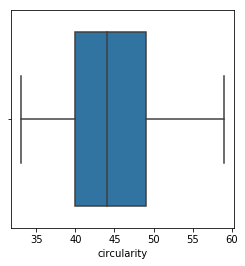

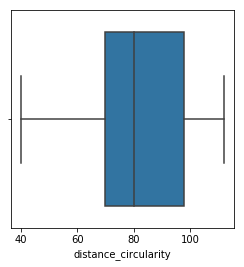

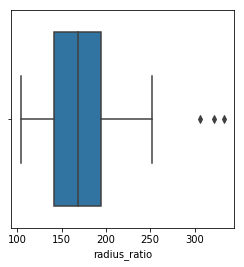

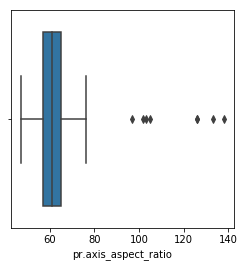

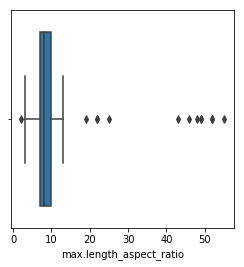

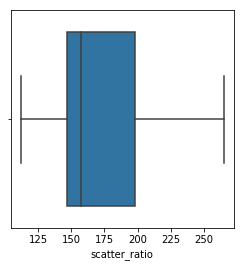

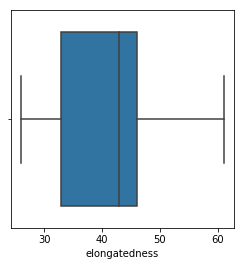

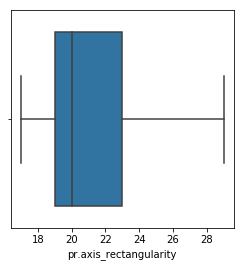

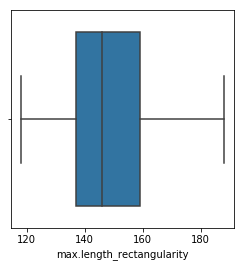

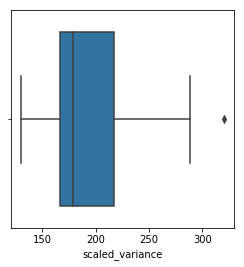

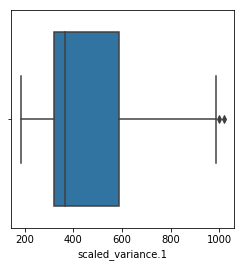

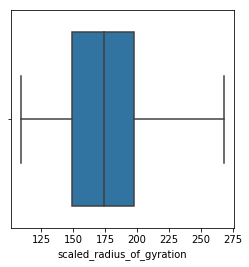

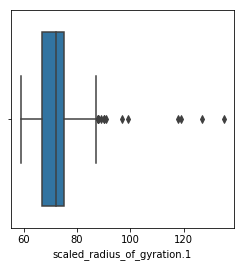

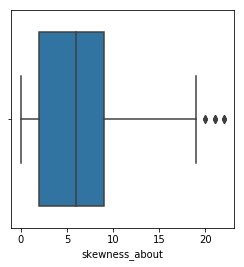

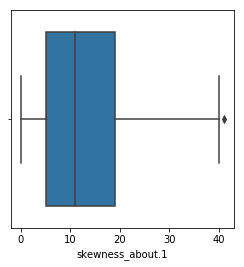

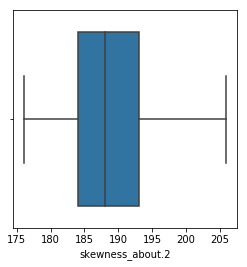

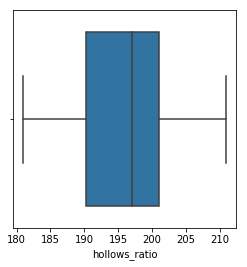

In [11]:
for col in (['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']):
    sns.boxplot(x=col,data=df,orient="h")
    plt.show()
#sns.boxplot(x="class",y="circularity",data=df,orient="v")

In [12]:
# From the Boxplot, it is clearly visible that the columns radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio,
# scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1 have outliers

In [13]:
# Let's now check if the mean and median are really apart for those columns
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.888095   33.400979  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.678910    7.882119   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr.axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.631079   31.355195  130.0  167.00   
scaled_variance.1            846.0  439.494076  176.457706  184.0  318.25   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.447743    7.468450   59.0   67.00   
skewness_about               846.0    6.364286    4.903148    0.0    2.00   
skewness_about.1             846.0   12.602367    8.930792    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 168.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            364.0  586.75  1018.0  
scaled_radius_of_gyration    174.0  198.00   268.0  
scaled_radius_of_gyration.1   72.0   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

In [14]:
# Let's treat the outliers by replacing the values with mean
for col in (['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio',
'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    
    
    out_above = q3+(1.5*iqr)
    out_below = q1-(1.5*iqr)
    
    df[col]=np.where( ((df[col]>out_above)|(df[col]<out_below)),df[col].mean(),df[col])


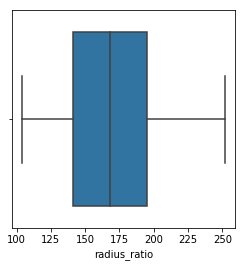

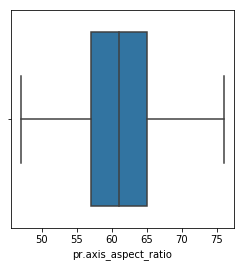

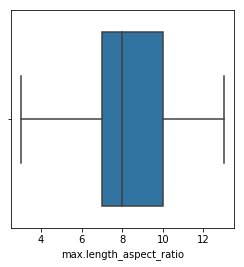

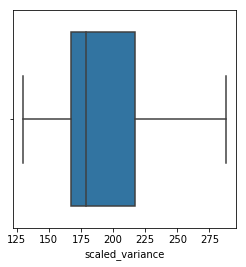

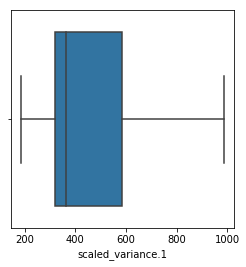

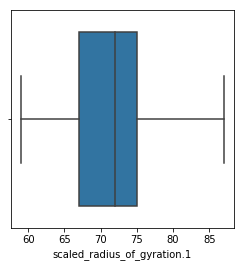

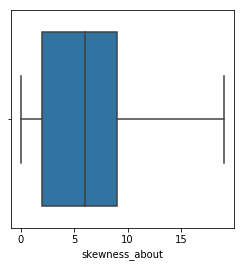

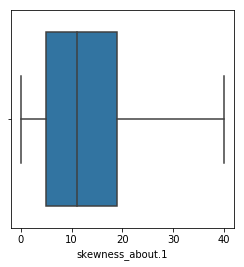

In [15]:
# Check and confirm that the outliers are treated now.
for col in (['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio',
'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']):
    sns.boxplot(x=col,data=df,orient="h")
    plt.show()
#sns.boxplot(x="class",y="circularity",data=df,orient="v")

In [16]:
# Check correlation between attributes
df.corr()


compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.721955     0.638433              0.794310   
pr.axis_aspect_ratio            0.192251     0.202809              0.243980   
max.length_aspect_ratio         0.496374     0.558887              0.663794   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr.axis_rectangularity          0.813636     0.844972              0.893128   
max.length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.770632     0.803466              0.870166   
scaled_variance.1               0.810359     0.832468              0.886994   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration.1    -0.249108     0.069074             -0.231069   
skewness_about                  0.198231     0.137039              0.099574   
skewness_about.1                0.156811    -0.010177              0.262615   
skewness_about.2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721955              0.192251   
circularity                      0.638433              0.202809   
distance_circularity             0.794310              0.243980   
radius_ratio                     1.000000              0.652242   
pr.axis_aspect_ratio             0.652242              1.000000   
max.length_aspect_ratio          0.466451              0.151681   
scatter_ratio                    0.769652              0.193583   
elongatedness                   -0.825656             -0.297940   
pr.axis_rectangularity           0.743946              0.162180   
max.length_rectangularity        0.579875              0.148206   
scaled_variance                  0.787155              0.209220   
scaled_variance.1                0.762564              0.194616   
scaled_radius_of_gyration        0.551026              0.149013   
scaled_radius_of_gyration.1     -0.390299             -0.321936   
skewness_about                   0.036325             -0.056378   
skewness_about.1                 0.179824             -0.021621   
skewness_about.2                 0.405653              0.400027   
hollows_ratio                    0.491681              0.415208   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.496374       0.812235   
circularity                                 0.558887       0.848207   
distance_circularity                        0.663794       0.904400   
radius_ratio                                0.466451       0.769652   
pr.axis_aspect_ratio                        0.151681       0.193583   
max.length_aspect_ratio                     1.000000       0.487478   
scatter_ratio                               0.487478       1.000000   
elongatedness                              -0.501249      -0.970723   
pr.axis_rectangularity                      0.485319       0.989370   
max.length_rectangularity                   0.642076       0.808356   
scaled_variance                             0.403416       0.960413   
scaled_variance.1                           0.460625       0.984360   
scaled_radius_of_gyration                   0.396736       0.799266   
scaled_radius_of_gyration.1                -0.336926       0.009315   
skewness_about                              0.080938       0.064476   
skewness_about.1                            0.140758       0.212465   
skewness_about.2                            0.

In [17]:
#fig_size = plt.rcParams["figure.figsize"]

#fig_size[0] = 8

#fig_size[1] = 10

#plt.rcParams["figure.figsize"] = fig_size

In [18]:
#corr = df.corr()
#fig = plt.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
#fig.colorbar(cax)
#ticks = np.arange(0,len(df.columns),1)
#ax.set_xticks(ticks)
#plt.xticks(rotation=90)
#ax.set_yticks(ticks)
#ax.set_xticklabels(df.columns)
#ax.set_yticklabels(df.columns)
#plt.show()

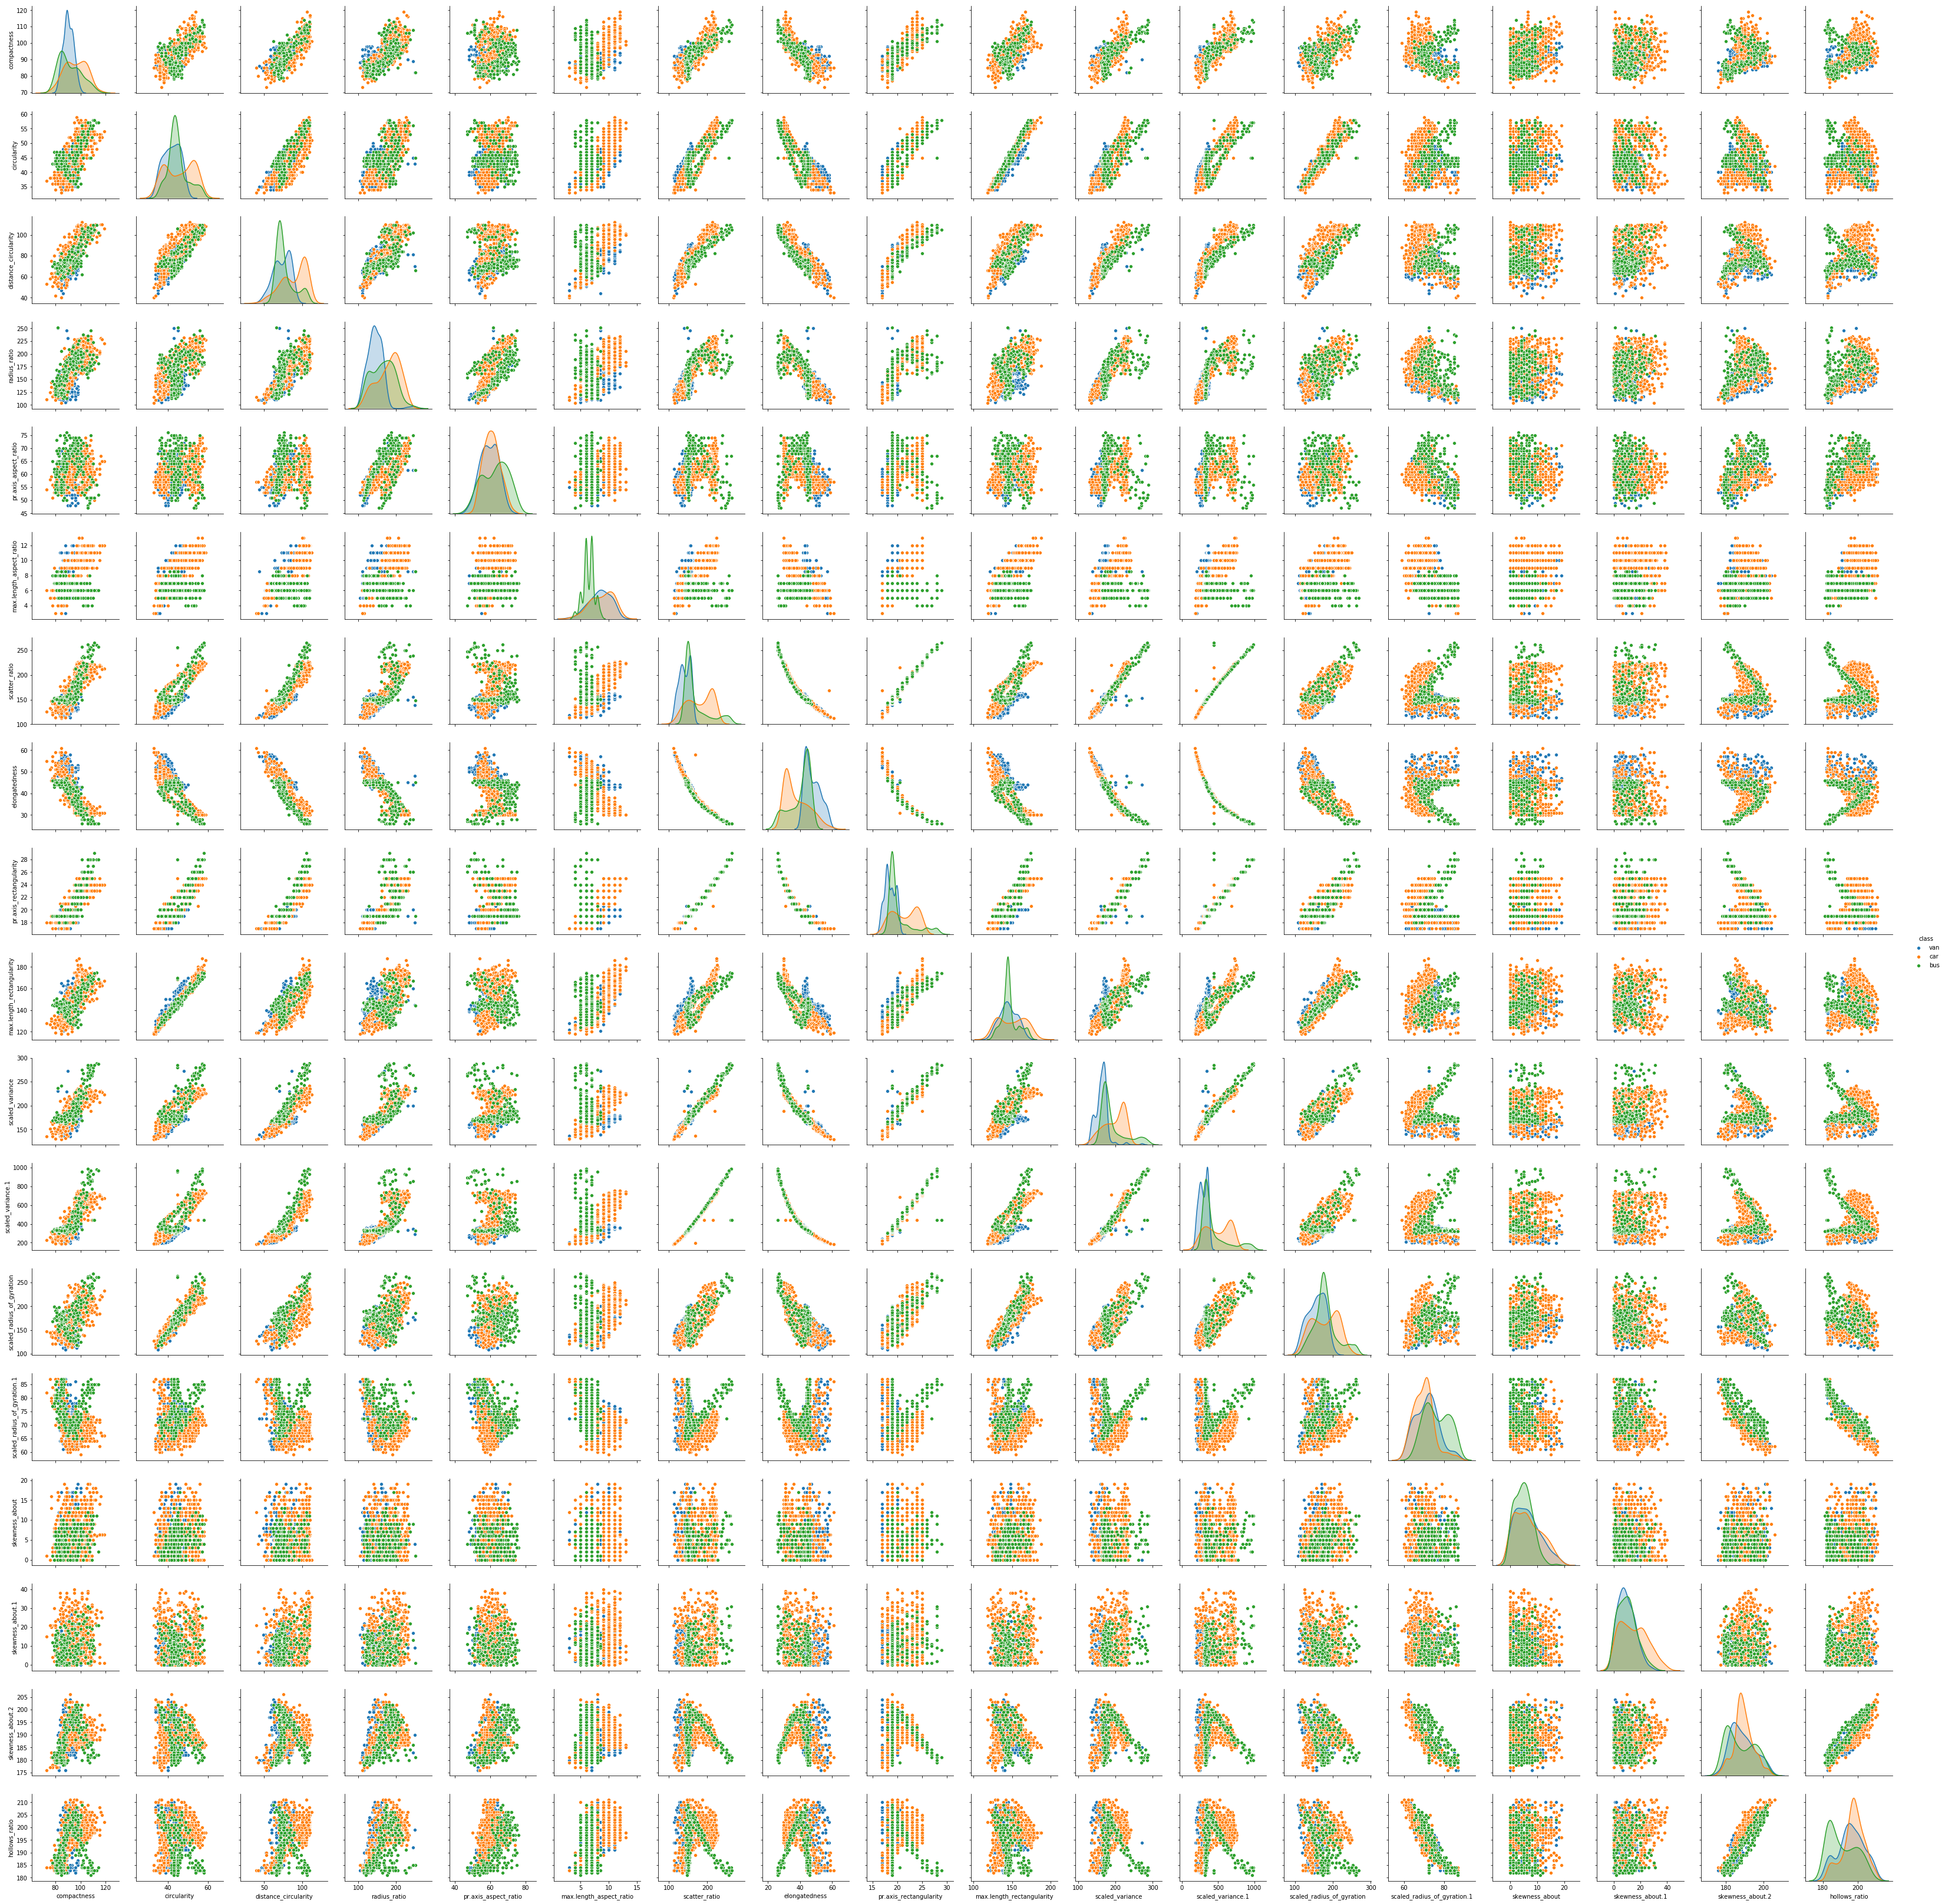

In [19]:
sns.pairplot(df,diag_kind='kde',hue='class')

In [20]:
# The columns distance_circularity, scatter_ratio,pr.axis_rectangularity, scaled_variance, scaled_variance.1  can be dropped because it has high correlation with compactness
# #The column skewness_about.2 and scaled_radius_of_gyration.1 can be dropped because it has high correlation with hollows_ratio
# The columns max.length_rectangularity and scaled_radius_of_gyration can be dropped because they have high correlation with Circularity
# The column elongatedness has high correlation with compactness, hence can be dropped
# df_corr=df.drop(columns=["distance_circularity","elongatedness","scatter_ratio","pr.axis_rectangularity", "scaled_variance", "scaled_variance.1","skewness_about.2","max.length_rectangularity","scaled_radius_of_gyration","scaled_radius_of_gyration.1"])

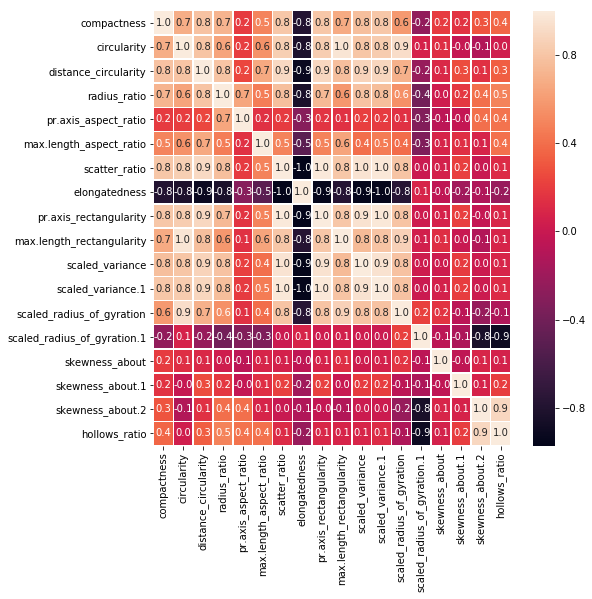

In [21]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

In [157]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

In [158]:
to_drop

['scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'skewness_about.2',
 'hollows_ratio']

In [159]:
# Drop features 
# We will only drop columns having high correlation (0.95)
df_corr=df.drop(columns=to_drop,axis=0)

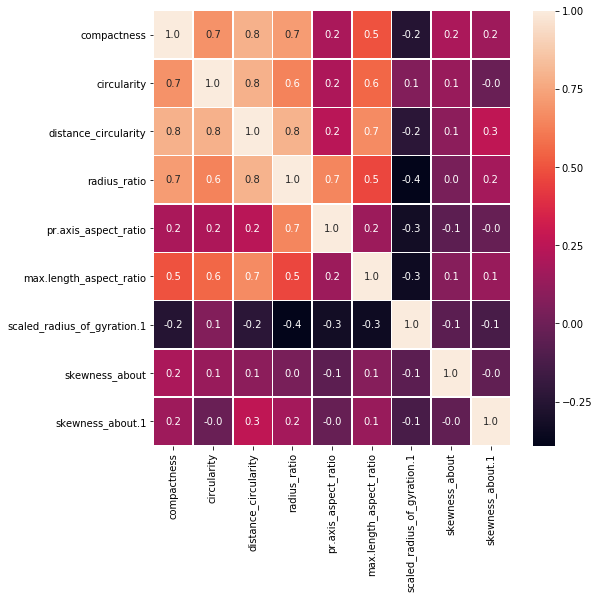

In [160]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_corr.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

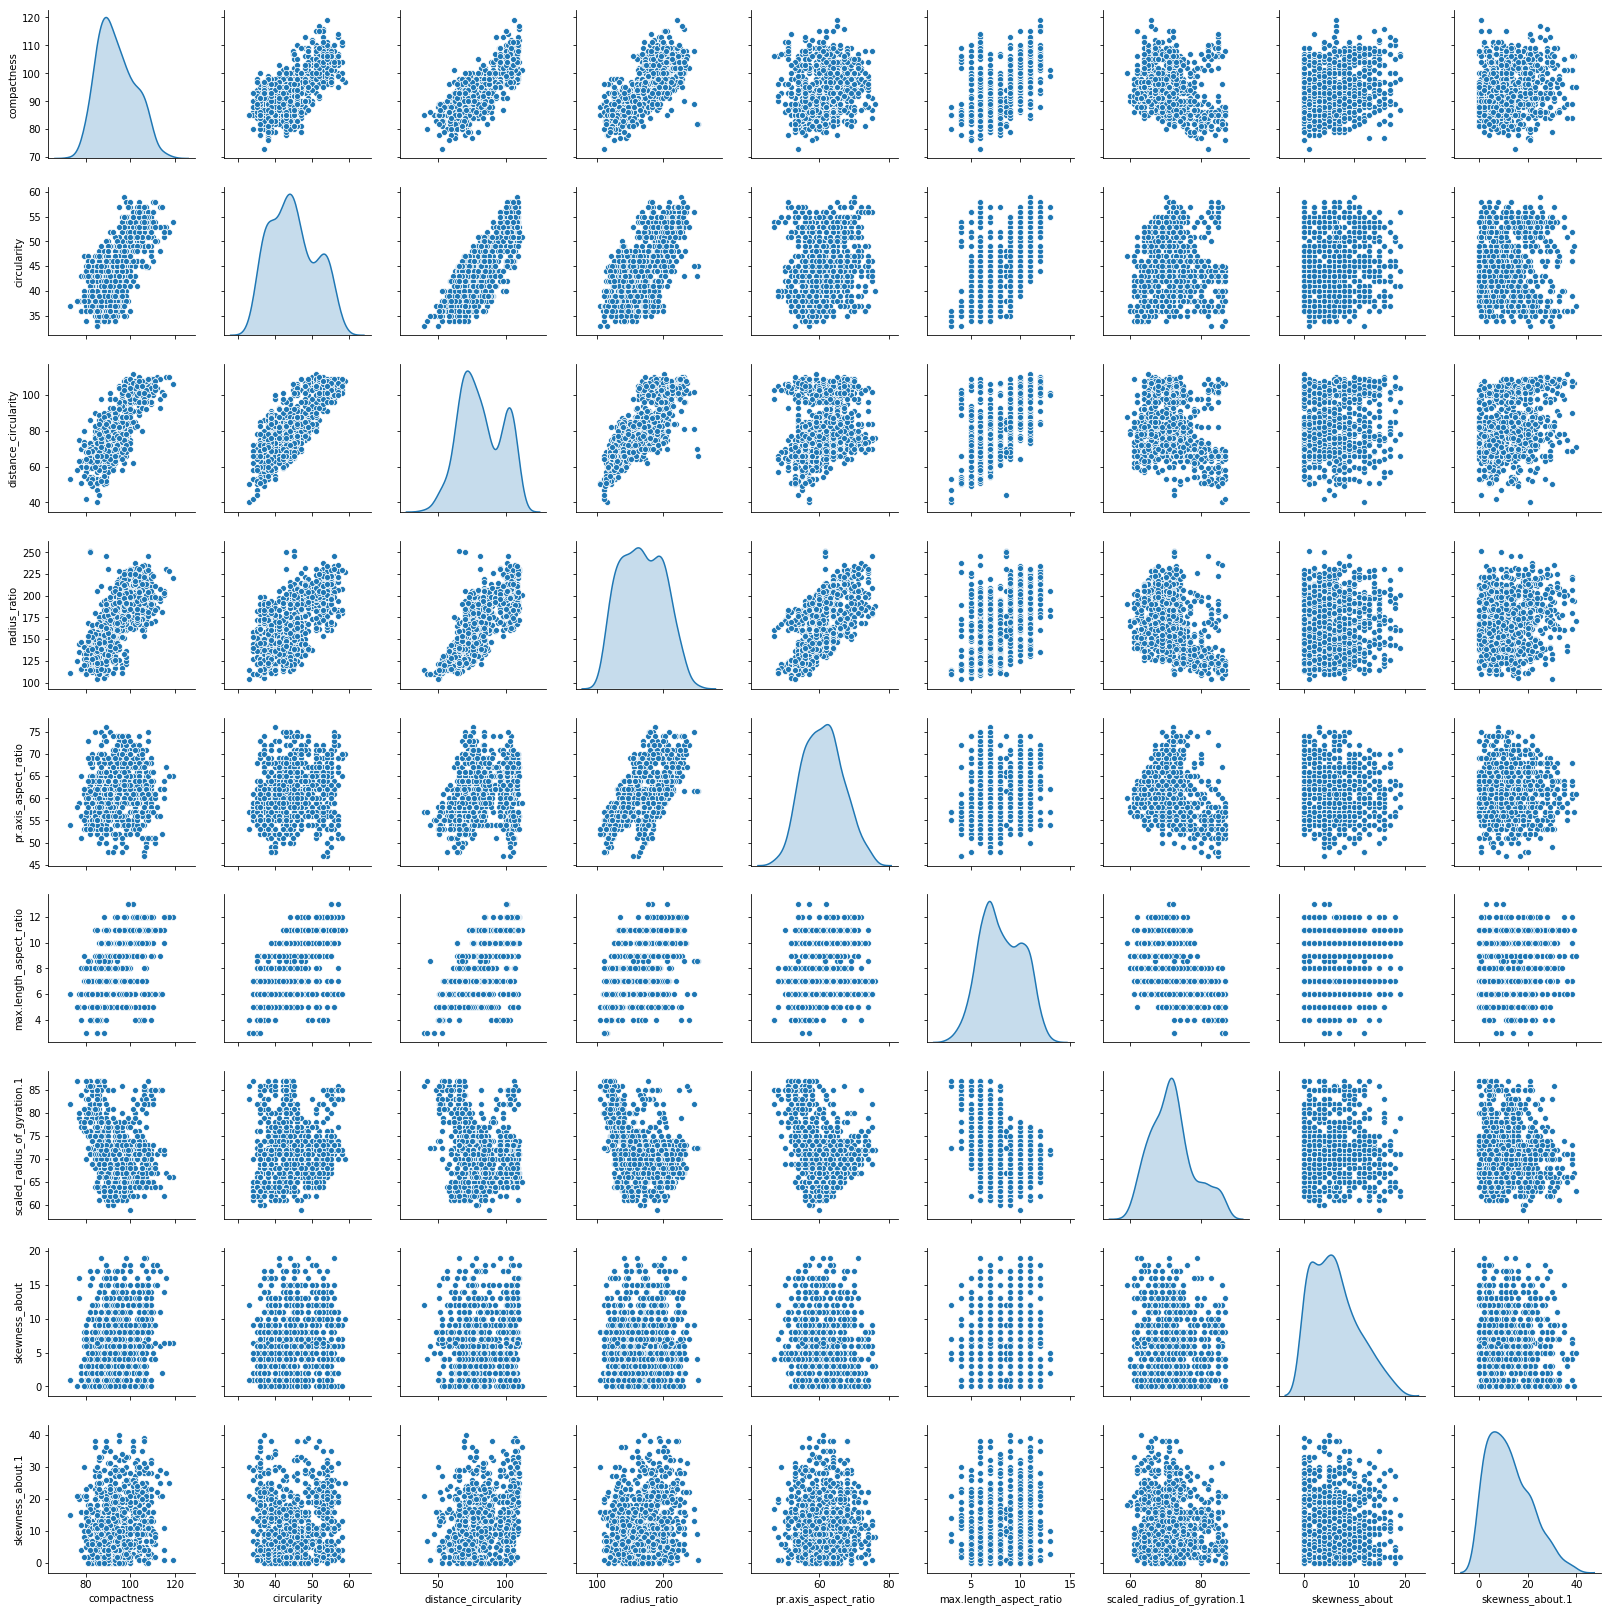

In [161]:
sns.pairplot(df_corr,diag_kind='kde')

In [162]:
X=df_corr.drop(columns='class')

In [163]:
Y=df_corr['class']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)

In [165]:
X_train_std = pd.DataFrame(StandardScaler().fit_transform(X_train),columns=X_train.columns)

In [166]:
X_test_std = pd.DataFrame(StandardScaler().fit_transform(X_test),columns=X_test.columns)

In [167]:
from sklearn.decomposition import PCA

In [168]:
scikit_pca = PCA(n_components=9)
scikit_pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [169]:
var= scikit_pca.explained_variance_ratio_


In [170]:
var1=np.cumsum(np.round(scikit_pca.explained_variance_ratio_, decimals=4)*100)


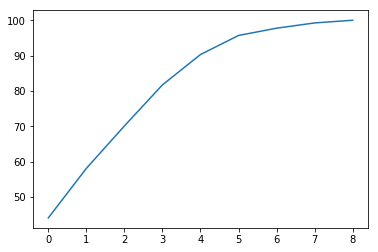

In [171]:
plt.plot(var1)


In [172]:
#Looking at above plot I'm taking 6 variables
pca = PCA(n_components=6)
pca.fit(X_train_std)

# Create Test and Train datasets
X_t_train = pca.transform(X_train_std)
X_t_test = pca.transform(X_test_std)


PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [173]:
#sns.pairplot(pd.DataFrame(X_t_train))

In [174]:
#X_t_train

In [175]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [181]:
# Create parameter grid with kernels linear and rbf and C values 0.01,0.05,0.5 and 1 respectively
param_grid = {'kernel': ['linear','rbf'],
             'C': [0.01,0.05,0.5,1] }

svc = SVC()

In [182]:
gs = GridSearchCV(svc,param_grid=param_grid,cv=10)

In [183]:
gs.fit(X_t_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [184]:
# Create dummy array
resultsWHP=[]

In [185]:
print("Best Hyper Parameters:",gs.best_params_)
#Prediction
prediction=gs.predict(X_t_test)
## Evaluation
# Accuracy
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
resultsWHP.append(metrics.accuracy_score(prediction,y_test))
# Confusion Metrix 
print("Confusion Matrix:   \n", metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.8858267716535433
Confusion Matrix:   
 [[ 66   2   3]
 [  1 111  10]
 [  1  12  48]]
